## Importing Libraries

In [29]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import warnings


warnings.filterwarnings("ignore")

## Loading Data

In [30]:
df = pd.read_csv("Global YouTube Statistics.csv", encoding="latin-1")

In [31]:
df.head(5)

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


## Data Cleaning

In [32]:
df_cleaned = df.replace('nan', pd.NA)  # Replace 'nan' with pandas' NA for numeric columns
numeric_columns = ['rank', 'subscribers', 'video views', 'video_views_for_the_last_30_days',
                   'lowest_monthly_earnings', 'highest_monthly_earnings', 'lowest_yearly_earnings',
                   'highest_yearly_earnings', 'subscribers_for_last_30_days', 'created_year', 'Unemployment rate']
for col in numeric_columns:
    df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')

df_cleaned = df_cleaned.dropna()

top_10_subscribers = df_cleaned.nlargest(10, 'subscribers')

## Visualisasi

In [33]:
fig1 = px.bar(top_10_subscribers, x='subscribers', y='Youtuber', orientation='h', text='subscribers',
              color='subscribers', labels={'subscribers': 'Subscribers (in billions)'},
              color_continuous_scale='Viridis')
fig1.update_traces(marker_line_color='rgb(8,48,107)', marker_line_width=1.5,
                    opacity=0.8, textposition='inside')
fig1.update_layout(title_text='Top 10 YouTube Channels by Subscribers', yaxis_title='YouTube Channel',
                   xaxis_title='Subscribers (in billions)', height=500)
fig1.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

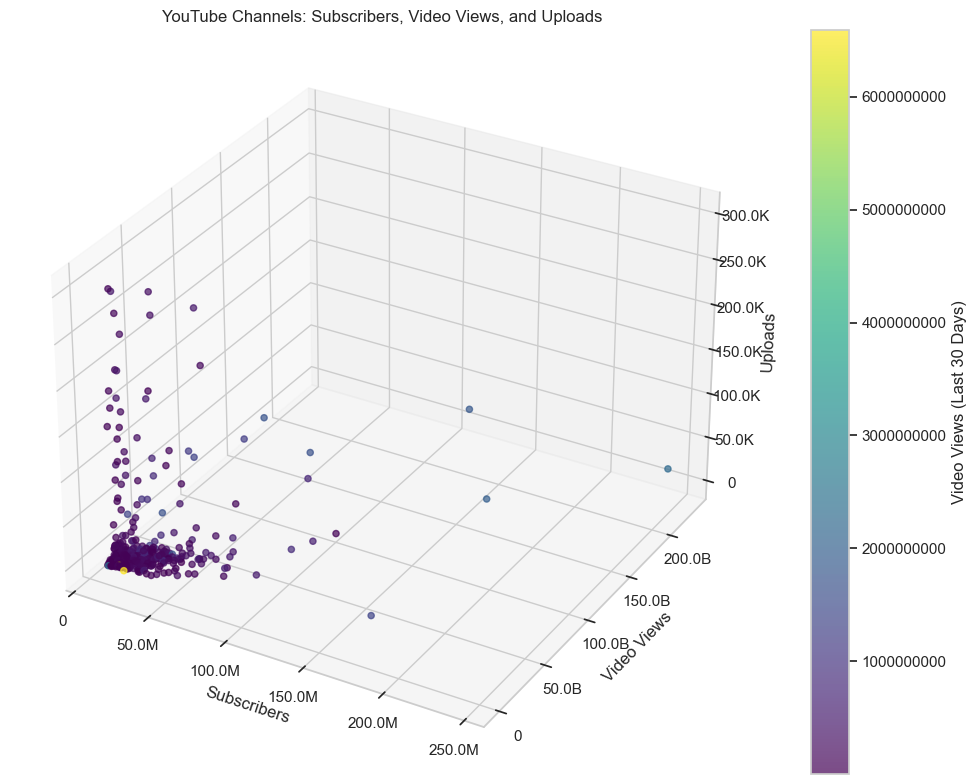

In [ ]:
# Create 3D scatter plot using matplotlib
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Create scatter plot
scatter = ax.scatter(df_cleaned['subscribers'],
                    df_cleaned['video views'],
                    df_cleaned['uploads'],
                    c=df_cleaned['video_views_for_the_last_30_days'],
                    cmap='viridis',
                    alpha=0.7)

# Customize the plot
ax.set_xlabel('Subscribers')
ax.set_ylabel('Video Views')
ax.set_zlabel('Uploads')
plt.title('YouTube Channels: Subscribers, Video Views, and Uploads')

# Add colorbar
plt.colorbar(scatter, label='Video Views (Last 30 Days)')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed